In [196]:
import numpy as np
import seaborn as sns

In [58]:
with open('../data/s16_1.txt') as fin:
    s1 = fin.read()
with open('../data/s16_2.txt') as fin:
    s2 = fin.read()
with open('../data/d16.txt') as fin:
    s3 = fin.read()

In [59]:
def read_data(s):
    M = []
    for line in s.split():
        M.append(list(line))
    return np.array(M)

In [188]:
def get_min_score(M, current, direction, score):
    global SCORES
    if M[current[0], current[1]] == '#':
        SCORES[current[0], current[1]] = np.inf
        return True
    if SCORES[current[0], current[1]] < score:
        return True
    else:
        SCORES[current[0], current[1]] = score
        a = get_min_score(M, (current[0] + direction[0], current[1] + direction[1]), direction, score + 1)
        b = get_min_score(M, (current[0] + direction[1], current[1] + direction[0]), (direction[1], direction[0]), score + 1001)
        c = get_min_score(M, (current[0] - direction[1], current[1] - direction[0]), (-direction[1], -direction[0]), score + 1001)
        return True

In [198]:
def track_back(M, current, previous):
    global TRACK
    TRACK[current[0], current[1]] = 1
    score = SCORES[current[0], current[1]]
    if SCORES[current[0] + 1, current[1] + 0] < score:
        track_back(M, (current[0] + 1, current[1] + 0))
    if SCORES[current[0] - 1, current[1] + 0] < score:
        track_back(M, (current[0] - 1, current[1] + 0))
    if SCORES[current[0] + 0, current[1] + 1] < score:
        track_back(M, (current[0] + 0, current[1] + 1))
    if SCORES[current[0] + 0, current[1] + -1] < score:
        track_back(M, (current[0] + 0, current[1] + -1))
         

In [199]:
M = read_data(s1)
SCORES = np.ones(shape=M.shape)
SCORES *= np.inf
TRACK = np.zeros(shape=M.shape)
i, j = np.where(M=='S')
i = i[0]
j = j[0]
get_min_score(M, (i, j), (0, 1), 0)
i, j = np.where(M=='E')
i = i[0]
j = j[0]
print(int(SCORES[i, j]))
track_back(M, (i, j))

7036


In [201]:
TRACK.sum()

37.0

In [191]:
M = read_data(s2)
SCORES = np.ones(shape=M.shape)
SCORES *= np.inf
i, j = np.where(M=='S')
i = i[0]
j = j[0]
get_min_score(M, (i, j), (0, 1), 0)
i, j = np.where(M=='E')
i = i[0]
j = j[0]
int(SCORES[i, j])

11048

In [192]:
M = read_data(s3)
SCORES = np.ones(shape=M.shape)
SCORES *= np.inf
i, j = np.where(M=='S')
i = i[0]
j = j[0]
get_min_score(M, (i, j), (0, 1), 0)
i, j = np.where(M=='E')
i = i[0]
j = j[0]
int(SCORES[i, j])

98484

<Axes: >

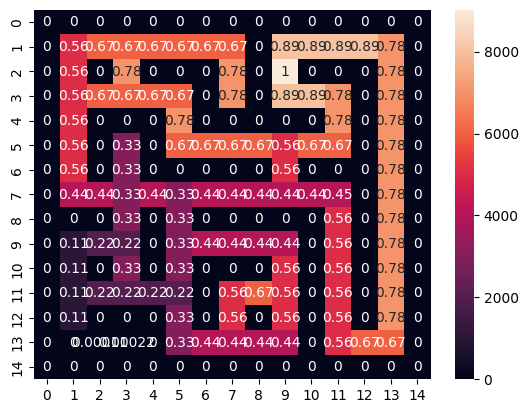

In [205]:
fil =  SCORES==np.inf
SCORES[fil] = 0.0
sns.heatmap(SCORES, annot=SCORES/SCORES.max())

<Axes: >

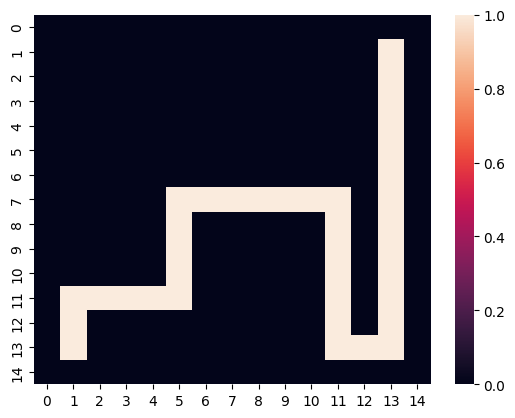

In [202]:
sns.heatmap(TRACK)